# Predicting Tweet Virality with Machine Learning Models

Sentiment analysis on social networks remains one of the most exciting fields to apply statistical tools and machine learning models, with the practical advantage of predicting trends and identifying patterns. The aim of this project is to answer the following question: **can we predict whether a tweet will become viral?**  

To address this, we collected and analyzed real-world data from Twitter (now X) provided by the CodeCademy platform (https://www.codecademy.com, course: *Build a Machine Learning Model*). We extracted the main features of each tweet and implemented several machine learning algorithms with the goal of classifying tweets into four categories: `unpopular`, `average`, `popular`, or `super-popular`.


## Preliminary Analysis 
Let us start by loading the dataset and visualize its content. In the following we are going to make use of the `pandas` library to perform data manipulation and explorartory analysis. The goal of this section is to find the relevant features and labels that we will use for our models.

In [152]:
import pandas as pd

In [153]:
random_tweets = pd.read_json("../data/random_tweets.json", lines=True)

random_tweets.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status,withheld_in_countries
0,2018-07-31 13:34:40+00:00,1024287229525598210,1024287229525598208,RT @KWWLStormTrack7: We are more than a month ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-31 13:34:40+00:00,1024287229512953856,1024287229512953856,@hail_ee23 Thanks love its just the feeling of...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.024128e+18,1.024128e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-31 13:34:40+00:00,1024287229504569344,1024287229504569344,RT @TransMediaWatch: Pink News has more on the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,0.0,NaN,NaN,NaN,NaN,NaN
3,2018-07-31 13:34:40+00:00,1024287229496029190,1024287229496029184,RT @realDonaldTrump: One of the reasons we nee...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-31 13:34:40+00:00,1024287229492031490,1024287229492031488,RT @First5App: This hearing of His Word doesn’...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


Let us print the general information of our dataframe in order to inspect the datatypes and missing values.

In [154]:
random_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 11099 non-null  datetime64[ns, UTC]
 1   id                         11099 non-null  int64              
 2   id_str                     11099 non-null  int64              
 3   text                       11099 non-null  object             
 4   truncated                  11099 non-null  bool               
 5   entities                   11099 non-null  object             
 6   metadata                   11099 non-null  object             
 7   source                     11099 non-null  object             
 8   in_reply_to_status_id      1402 non-null   float64            
 9   in_reply_to_status_id_str  1402 non-null   float64            
 10  in_reply_to_user_id        1503 non-null   float64            
 11  in

Our dataset contains 31 columns and 11099 rows. Using the `info` method shows that we have numerical as well as categorical data. Nevertheless, we see that there are many columns with missing values. Many of these columns have too few information to be considered meaningful features and in general, they don't seem to be directly related to the popularity of the tweets. Let's drop these columns!

In [155]:
to_drop = ['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name','geo', 'coordinates','place' , 'contributors', 'retweeted_status', 'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str', 'extended_entities', 'quoted_status', 'withheld_in_countries']
random_tweets = random_tweets.drop(to_drop, axis = 1)


In [156]:
random_tweets.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,2018-07-31 13:34:40+00:00,1024287229525598210,1024287229525598208,RT @KWWLStormTrack7: We are more than a month ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 145388018, 'id_str': '145388018', 'name...",False,3,0,False,False,en
1,2018-07-31 13:34:40+00:00,1024287229512953856,1024287229512953856,@hail_ee23 Thanks love its just the feeling of...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 2407992339, 'id_str': '2407992339', 'na...",False,0,0,False,False,en
2,2018-07-31 13:34:40+00:00,1024287229504569344,1024287229504569344,RT @TransMediaWatch: Pink News has more on the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 901579698223931392, 'id_str': '90157969...",False,5,0,False,False,en
3,2018-07-31 13:34:40+00:00,1024287229496029190,1024287229496029184,RT @realDonaldTrump: One of the reasons we nee...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 23438548, 'id_str': '23438548', 'name':...",False,11106,0,False,False,en
4,2018-07-31 13:34:40+00:00,1024287229492031490,1024287229492031488,RT @First5App: This hearing of His Word doesn’...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 942424782, 'id_str': '942424782', 'name...",False,6,0,False,False,en


Let us explore the possible features that we may use to predict whether a given tweet will be popular or not. To do this, we compute the relevant statistical quantities on several columns. 

We expect that the number of retweets can be a good creterion to establish whether a tweet is viral: let us call `describe` on it.

In [157]:
random_tweets['retweet_count'].describe()

count     11099.000000
mean       2777.956392
std       12180.169923
min           0.000000
25%           0.000000
50%          13.000000
75%         428.500000
max      413719.000000
Name: retweet_count, dtype: float64

We see that the average number of retweet is around 2800, but we also notice a pretty large standard deviation, possibily highliting a skewed distribution. We also note that only the top 25% received more than 430 retweets! Let's plot the distribution of retweets with a histogram to have a better vision.

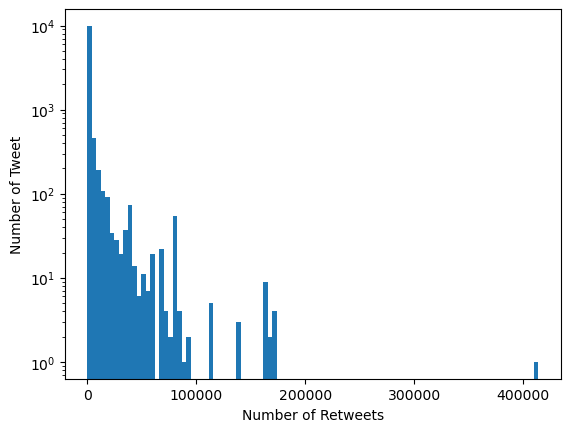

In [158]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(random_tweets['retweet_count'], bins=100)
plt.yscale('log') 
plt.xlabel('Number of Retweets')
plt.ylabel('Number of Tweet')

plt.show()

As expected, the distribution is very skewed with many tweets receiving 0 retweets. Nevertheless, we see an evident tail with non zero retweets, as confirmed by the various percentiles computed above. We are going to use the number of retweets as our parameter that dictate whether a tweet is popular or not.  
Before using it as a label, we categorize tweets into four popularity classes based on the quartiles computed above:

- **Unpopular**: bottom 25% of tweets  
- **Average**: tweets between the 25th and 50th percentiles  
- **Popular**: tweets between the 50th and 75th percentiles
- **Super-Popular**: top 25% of tweets.  

We will implement a custom function to assign these classes and create a new `'popularity'` column in the dataset.


In [159]:
perc25 = np.percentile(random_tweets['retweet_count'],25)
perc50 = np.percentile(random_tweets['retweet_count'],50)
perc75 = np.percentile(random_tweets['retweet_count'],75)


def ispop(row):
    if row['retweet_count']<= perc25:
        return 'unpop'
    elif perc25 <row['retweet_count']<= perc50:
        return 'average'
    elif perc50 <row['retweet_count']<= perc75:
        return 'popular'
    else:
        return 'super_pop'

random_tweets['popularity'] = random_tweets.apply(ispop, axis = 1)

random_tweets.head()


,created_at,id,id_str,text,truncated,entities,metadata,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,popularity
0,2018-07-31 13:34:40+00:00,1024287229525598210,1024287229525598208,RT @KWWLStormTrack7: We are more than a month ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 145388018, 'id_str': '145388018', 'name...",False,3,0,False,False,en,average
1,2018-07-31 13:34:40+00:00,1024287229512953856,1024287229512953856,@hail_ee23 Thanks love its just the feeling of...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 2407992339, 'id_str': '2407992339', 'na...",False,0,0,False,False,en,unpop
2,2018-07-31 13:34:40+00:00,1024287229504569344,1024287229504569344,RT @TransMediaWatch: Pink News has more on the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 901579698223931392, 'id_str': '90157969...",False,5,0,False,False,en,average
3,2018-07-31 13:34:40+00:00,1024287229496029190,1024287229496029184,RT @realDonaldTrump: One of the reasons we nee...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 23438548, 'id_str': '23438548', 'name':...",False,11106,0,False,False,en,super_pop
4,2018-07-31 13:34:40+00:00,1024287229492031490,1024287229492031488,RT @First5App: This hearing of His Word doesn’...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 942424782, 'id_str': '942424782', 'name...",False,6,0,False,False,en,average


Let's show our label distribution using `value_counts`.

In [160]:
random_tweets['popularity'].value_counts()

popularity
unpop        3690
super_pop    2775
popular      2762
average      1872
Name: count, dtype: int64

We observe that the `unpop` category is more populated than the others, particularly compared to the minority `average` class. This class imbalance can negatively affect the performance of our machine-learning models and must be addressed by carefully selecting and interpreting performance metrics.

Next, we focus on the features.  
One simple yet informative feature is the hashtag count per tweet.  
We can define a custom function that counts the hashtag in the text and finally visualize its distribution with a histogram.


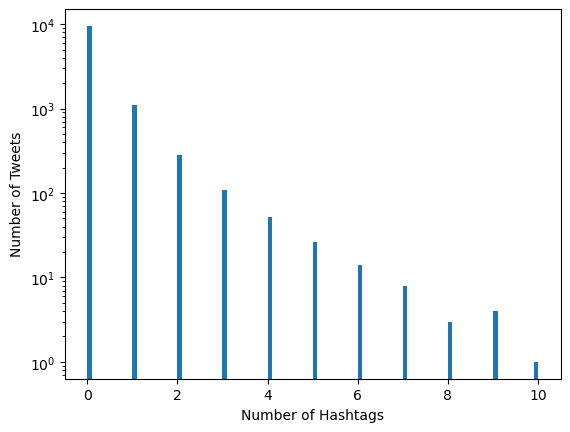

In [161]:
def counthash(row):
    if pd.isnull(row['text']):
        return 0
    ct = 0
    for word in row['text'].split():
        if word.startswith('#'):
            ct += 1
    return ct

random_tweets['hash_no'] = random_tweets.apply(counthash, axis = 1)

plt.hist(random_tweets['hash_no'], bins=100)
plt.yscale('log') 
plt.xlabel('Number of Hashtags')
plt.ylabel('Number of Tweets')

plt.show()

How informative this feature can be? Let's make a scatter plot visualizing `retweet_count` vs `hash_no` and the correspondent correlation coefficient.

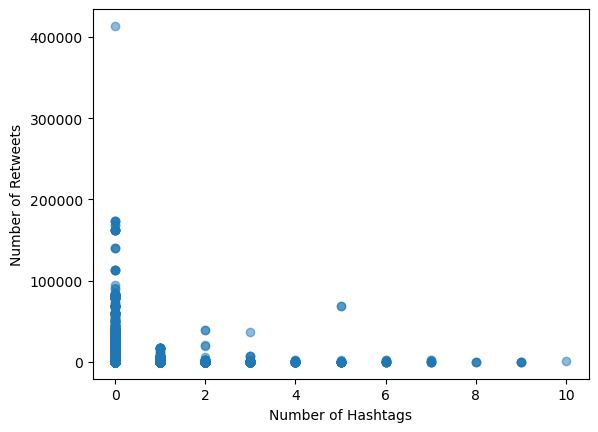

Correlation Coefficient: -0.0477376814991003


In [162]:
plt.scatter(random_tweets['hash_no'], random_tweets['retweet_count'], alpha = 0.5)
plt.ylabel('Number of Retweets')
plt.xlabel('Number of Hashtags')
plt.show()

print('Correlation Coefficient:', np.corrcoef(random_tweets['retweet_count'], random_tweets['hash_no'])[0,1])

The slightly negative correlation indicates a weak inverse linear relationship, consistent with the scatterplot, which shows that most highly popular tweets have zero hashtags, while the distribution flattens for larger numbers of hashtags.

Another interesting feature that we may inspect is the length of the tweets. Let's add another column containing this information by counting the number of words in each tweet.

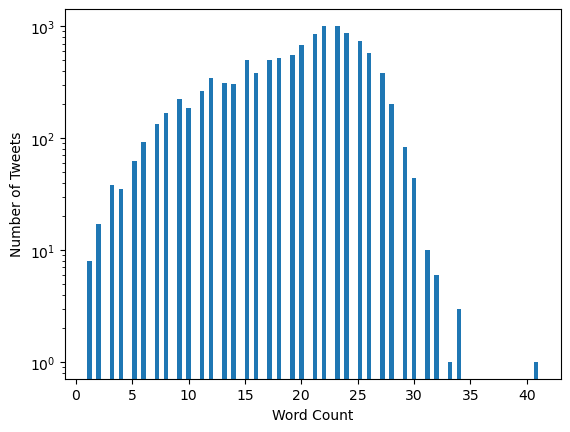

In [163]:
random_tweets['length'] = random_tweets['text'].str.split().str.len()

plt.hist(random_tweets['length'], bins=100)
plt.yscale('log') 
plt.xlabel('Word Count')
plt.ylabel('Number of Tweets')

plt.show()

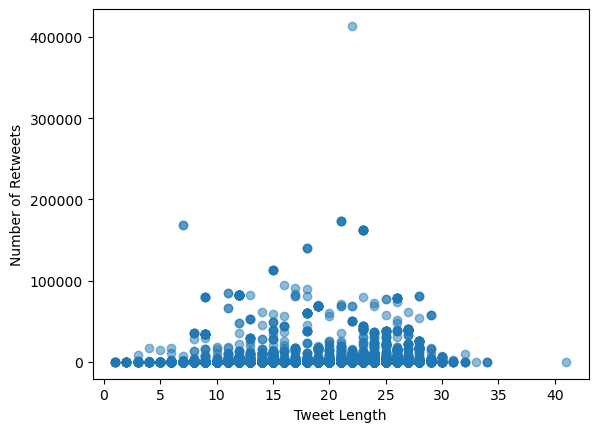

Correlation Coefficient: 0.011731488654861046


In [164]:
plt.scatter( random_tweets['length'],random_tweets['retweet_count'], alpha = 0.5)
plt.ylabel('Number of Retweets')
plt.xlabel('Tweet Length')
plt.show()

print('Correlation Coefficient:', np.corrcoef(random_tweets['retweet_count'], random_tweets['length'])[0,1])

Although the correlation is weak, we see an interesting "bell shape" in the scatterplot, suggesting a non-linear relationship that can't be catched by the correlation index!

Mentions can also serve as strong indicators of trending topics.  
Similarly to what we have done for the hashtags, we count the number of mentions appearing in each tweet and plot the resulting distribution.


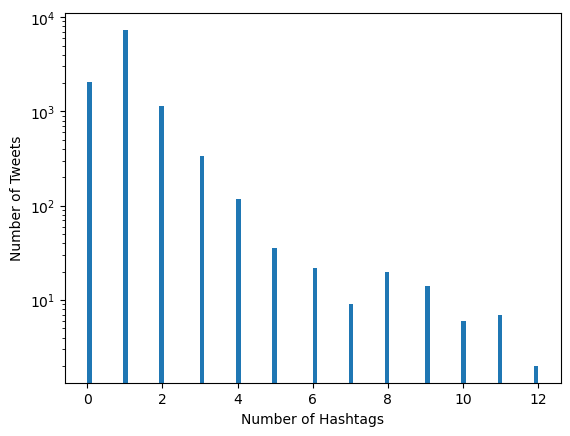

In [165]:
def countmension(row):
    if pd.isnull(row['text']):
        return 0
    ct = 0
    for word in row['text'].split():
        if word.startswith('@'):
            ct += 1
    return ct

random_tweets['mention_no'] = random_tweets.apply(countmension, axis = 1) 

plt.hist(random_tweets['mention_no'], bins=100)
plt.yscale('log') 
plt.xlabel('Number of Hashtags')
plt.ylabel('Number of Tweets')

plt.show()

What about the relation with the retweet count? Let's inspect the scatter plot.

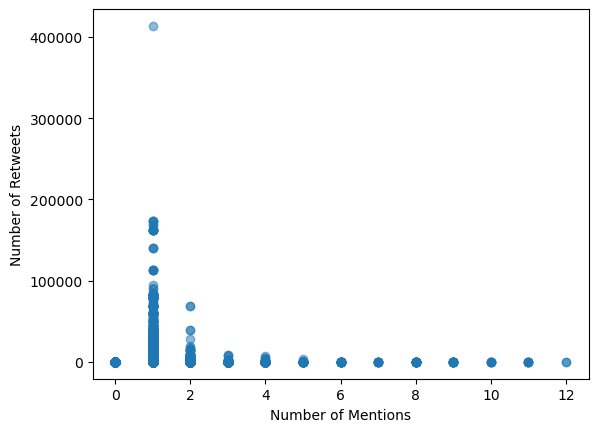

Correlation Coefficient: -0.009195481581602173


In [166]:
plt.scatter(random_tweets['mention_no'],random_tweets['retweet_count'], alpha = 0.5)
plt.ylabel('Number of Retweets')
plt.xlabel('Number of Mentions')
plt.show()

print('Correlation Coefficient:', np.corrcoef(random_tweets['retweet_count'], random_tweets['mention_no'])[0,1])


Also in this case the extremely small correlation suggests the absence of linearity between the number of mentions and the popularity of the tweet.

Another interesting feature that can come in handy is the language of the tweet. We may expect that tweets that are more viral are written in the most popular languages. Let's call value_counts on the language column.

In [167]:
random_tweets['lang'].value_counts()

lang
en     10623
ja       176
tl        61
ko        47
in        40
und       36
es        28
th        16
pt        15
fr        13
it         9
ru         5
zh         3
ca         3
ar         3
vi         3
de         3
nl         2
tr         2
ur         1
hi         1
et         1
sv         1
fa         1
ro         1
sl         1
pl         1
el         1
fi         1
ht         1
Name: count, dtype: int64

Again, a very unbalanced category: out of 11000 tweets, 10000 are written in english. Let us define a boolean function that returns 0 if the tweet is english and 1 otherwise.

In [168]:
def iseng(row):
    if row['lang'] == 'en':
        return 0
    else:
        return 1
random_tweets['is_eng'] = random_tweets.apply(iseng, axis = 1)
random_tweets.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,popularity,hash_no,length,mention_no,is_eng
0,2018-07-31 13:34:40+00:00,1024287229525598210,1024287229525598208,RT @KWWLStormTrack7: We are more than a month ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 145388018, 'id_str': '145388018', 'name...",False,3,0,False,False,en,average,0,26,1,0
1,2018-07-31 13:34:40+00:00,1024287229512953856,1024287229512953856,@hail_ee23 Thanks love its just the feeling of...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 2407992339, 'id_str': '2407992339', 'na...",False,0,0,False,False,en,unpop,0,15,1,0
2,2018-07-31 13:34:40+00:00,1024287229504569344,1024287229504569344,RT @TransMediaWatch: Pink News has more on the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 901579698223931392, 'id_str': '90157969...",False,5,0,False,False,en,average,0,22,1,0
3,2018-07-31 13:34:40+00:00,1024287229496029190,1024287229496029184,RT @realDonaldTrump: One of the reasons we nee...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...","{'id': 23438548, 'id_str': '23438548', 'name':...",False,11106,0,False,False,en,super_pop,0,24,1,0
4,2018-07-31 13:34:40+00:00,1024287229492031490,1024287229492031488,RT @First5App: This hearing of His Word doesn’...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 942424782, 'id_str': '942424782', 'name...",False,6,0,False,False,en,average,0,24,1,0


Let’s create a DataFrame containing the selected features and the target label.

In [169]:
df_random = random_tweets[['id','mention_no','hash_no','length','is_eng','popularity']]
df_random

,id,mention_no,hash_no,length,is_eng,popularity
0,1024287229525598210,1,0,26,0,average
1,1024287229512953856,1,0,15,0,unpop
2,1024287229504569344,1,0,22,0,average
3,1024287229496029190,1,0,24,0,super_pop
4,1024287229492031490,1,0,24,0,average
...,...,...,...,...,...,...
11094,1024287114463195137,1,0,24,0,super_pop
11095,1024287114459074562,1,0,9,0,super_pop
11096,1024287114459074560,3,0,18,0,unpop
11097,1024287114442301442,1,0,29,0,average


## Predicting Popular Tweets with KNN

In this section we build a classifier based on the **K-Nearest Neighbour (KNN) algorithm**, to predict whether a tweet will be viral or not based on its number of retweets, the number of hashtags and the length of its text.

In [170]:
df_random.head()


,id,mention_no,hash_no,length,is_eng,popularity
0,1024287229525598210,1,0,26,0,average
1,1024287229512953856,1,0,15,0,unpop
2,1024287229504569344,1,0,22,0,average
3,1024287229496029190,1,0,24,0,super_pop
4,1024287229492031490,1,0,24,0,average


We first separate the features (`X`) from the labels (`y`). Then, we split the data into a training set (60%), a validation set (20%), and a test set (20%). The training and validation sets are used to compute accuracies and assess which parameter choices help avoid overfitting and underfitting. The remaining test set is finally used to compute and evaluate the model’s performance metrics.


In [171]:
from sklearn.model_selection import train_test_split

X_df = df_random[['mention_no', 'hash_no', 'length']]
labels_df = df_random['popularity']

X_train, X_test, y_train, y_test = train_test_split(X_df, labels_df, test_size=0.2,random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.25,random_state = 42)



Since features can have different scales, which may distort distance calculations in KNN, we use `StandardScaler` to normalize them via Z-score normalization. This step can be done with the `fit_transform` method on the training_data.


In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test) # Here we only use transform! We don't want to scale the test dataset with the different mean and stdev of the test set.


As a first estimate, let's train the KNN algorithm on our training dataset. Let's start with a random k before moving to tuning.

In [173]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier()

How well our classifier is doing on the training dataset? Let's import the metrics and evaluate the accuracy.

In [174]:
from sklearn.metrics import accuracy_score

predicted_train_labels = classifier.predict(X_train_scaled)
print('Training Accuracy:', accuracy_score(y_train, predicted_train_labels))

Training Accuracy: 0.4808529809280673


Our classifier correctly predicted outcomes 48% of the time, which is a big improvement with respect to picking at random a category (25 % probability, given the quartile-based divison of the labels). But can we do better? Let’s tune the number of neighbors and see if we can improve the  performance of the model. In the following, we scan over the `n_neighbors` parameter and compute the training and validation accuracies.

In [175]:
accuracies_train = []
accuracies_val = []

for k in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train_scaled, y_train)
    predicted_train_labels = classifier.predict(X_train_scaled)
    predicted_val_labels = classifier.predict(X_val_scaled)
    
    accuracies_train.append(accuracy_score(y_train, predicted_train_labels))
    accuracies_val.append(accuracy_score(y_val, predicted_val_labels))
    

Let's plot the accuracies as a function of the number of neighbors. We denote with a blue line the training accuracy, while the validation accuracy is denoted with a red line.

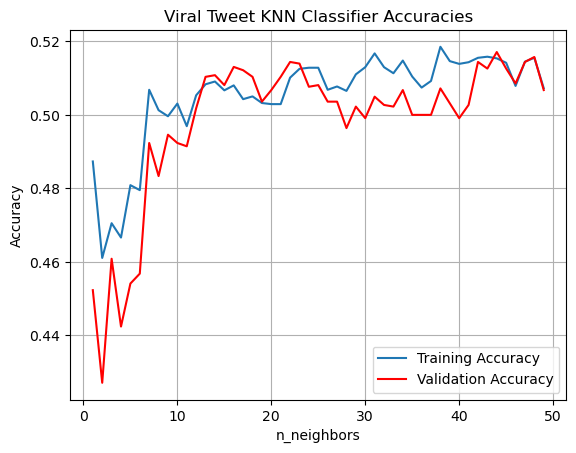

In [203]:
klist= range(1,50)
plt.plot(klist, accuracies_train, label= 'Training Accuracy')
plt.plot(klist, accuracies_val, c = 'red', label = 'Validation Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title("Viral Tweet KNN Classifier Accuracies")
plt.legend()
plt.grid(True)
plt.show()


From the plot, we observe that for very small values of `n_neighbors` (<10), the validation accuracy drops while the training accuracy remains slightly higher. This indicates overfitting, as the model becomes sensitive to individual points and outliers. Conversely, for large values of `n_neighbors` (>20), the validation accuracy decreases, showing underfitting, since the model is too smooth to capture the patterns in the data. Setting `n_neighbors = 13` achieves a balanced trade-off, with training and validation accuracies being roughly comparable at around 50%.


Finally, we evaluate the model on the test set. To do this, we first train the model on the combined train and validation datasets, and then compute accuracy along with other relevant metrics, such as precision and recall, on the test set. These metrics allow us to assess overall performance while specifically highlighting the model’s behavior with respect to false positives (via precision) and false negatives (via recall).

In [177]:
from sklearn.metrics import classification_report

classifier = KNeighborsClassifier(n_neighbors=13)

classifier.fit(np.concatenate([X_train_scaled,X_val_scaled]), np.concatenate([y_train, y_val]))

pred_test_labels = classifier.predict(X_test_scaled)
reportKNN = classification_report(y_test,pred_test_labels)

print('Test Accuracy:', accuracy_score(y_test,pred_test_labels))
print(reportKNN)

Test Accuracy: 0.4914414414414414
              precision    recall  f1-score   support

     average       0.39      0.17      0.24       366
     popular       0.34      0.48      0.39       561
   super_pop       0.41      0.46      0.43       576
       unpop       0.80      0.69      0.74       717

    accuracy                           0.49      2220
   macro avg       0.48      0.45      0.45      2220
weighted avg       0.51      0.49      0.49      2220



### KNN Results and Conclusion

Interestingly, the model achieves an overall accuracy of 49%, which is a clear improvement over random guessing, as noted above. However, the recall highlights the model’s difficulty in correctly identifying true instances of certain classes, particularly the `average` category, which has a recall of only 17%. On the other hand, its precision is relatively higher at 39%, indicating that when the model predicts `average` it is correct 39% of the time. This is understandable, given that `average` is a minority class. In contrast, the model performs well on the majority `unpop` category, achieving 80% precision and 69% recall.

These results indicate that while the model performs reasonably well, it tends to produce more false negatives (lower recall).  
This suggests room for improvement, particularly in better identifying the minority classes.


## Predicting Popular Tweets with Random Forests

From the previous implementation, we observed that the main challenge in classification is related to the imbalance between classes.  
To address this, instead of relying only on continuous features, we will categorize them and apply a **Random Forest classifier**, which is well-suited for handling categorical variables and imbalanced datasets.


In [178]:
df_random.head()

,id,mention_no,hash_no,length,is_eng,popularity
0,1024287229525598210,1,0,26,0,average
1,1024287229512953856,1,0,15,0,unpop
2,1024287229504569344,1,0,22,0,average
3,1024287229496029190,1,0,24,0,super_pop
4,1024287229492031490,1,0,24,0,average


We begin by focusing on the length of the tweets.  
To simplify, we categorize them into two groups:  
- **Wordy (1):** tweets with a word count above the average.  
- **Short (0):** tweets with a word count below or equal to the average.


In [179]:
import warnings
warnings.filterwarnings('ignore')


average = df_random['length'].mean()
def iswordy(row):
    if row['length'] > average:
        return 1
    else:
        return 0
df_random['is_wordy'] = df_random.apply(iswordy, axis = 1)

Similarly, we divide tweets based on the number of mentions.  
Tweets with a number of mentions above the 75th percentile are categorized as `high-mention (1)`, while those at or below the 75th percentile are categorized as `low-mention (0)`.


In [180]:
perc75 = np.percentile(df_random['mention_no'],75)
def ismentioned(row):
    if row['mention_no'] > perc75:
        return 1
    else:
        return 0
df_random['is_mentioned'] = df_random.apply(ismentioned, axis = 1)

We apply a similar categorization to the number of hashtags.  
Tweets are divided into four groups:  
- **0 hashtags**  
- **1 hashtag**  
- **2 hashtags**  
- **3 or more hashtags**


In [181]:
threshold = 2
def hashclass(row):
    if row['hash_no'] > threshold:
        return 3
    else:
        return row['hash_no']
df_random['hash_class'] = df_random.apply(hashclass, axis = 1)

That's how our dataframe looks like.

In [182]:
df_random[['hash_class','is_eng','is_mentioned','is_wordy','popularity']].head(10)

,hash_class,is_eng,is_mentioned,is_wordy,popularity
0,0,0,0,1,average
1,0,0,0,0,unpop
2,0,0,0,1,average
3,0,0,0,1,super_pop
4,0,0,0,1,average
5,0,0,0,1,popular
6,0,0,0,1,unpop
7,0,0,0,1,super_pop
8,0,0,0,1,super_pop
9,0,0,0,1,super_pop


Again, let's collect the relvant features and labels and split them into train, validation and test datasets.

In [183]:
labels = df_random[['popularity']]
data = df_random[['hash_class','is_eng','is_mentioned','is_wordy']]

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.25,random_state = 42)


As a first step, we apply the Random Forest algorithm and evaluate its performance on the training dataset. For now, we use the default `n_estimators = 100`. Parameter tuning will be discussed in the following cell.


In [184]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 42)
forest.fit(X_train, y_train)

pred_train_labels = forest.predict(X_train)
print('accuracy:', accuracy_score(y_train, pred_train_labels))



accuracy: 0.40801922210542124


With the default choice `n_estimators = 100`, we achieve approximately 40% accuracy on the training dataset. Similarly to what we did for KNN, we now move on to parameter tuning to investigate which value of `n_estimators` improves overall accuracy while maintaining a good bias–variance balance.


In [185]:
training_acc = []
validation_acc = []

for n_tree in range(10,210, 10):
    forest = RandomForestClassifier(n_estimators = n_tree, random_state = 42)
    forest.fit(X_train,y_train)
    
    pred_train_labels = forest.predict(X_train)
    pred_val_labels = forest.predict(X_val)
    
    training_acc.append(accuracy_score(y_train, pred_train_labels))
    validation_acc.append(accuracy_score(y_val, pred_val_labels))
    
    

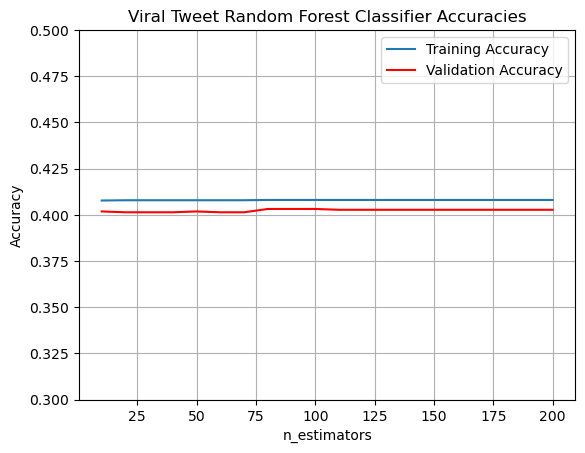

In [206]:
n_tree_list= range(10,210, 10)
plt.plot(n_tree_list, training_acc, label= 'Training Accuracy')
plt.plot(n_tree_list, validation_acc, c = 'red', label = 'Validation Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.ylim(0.3,0.5)
plt.title("Viral Tweet Random Forest Classifier Accuracies")
plt.legend()
plt.grid(True)
plt.show()


We observe that, within the range of `n_estimators` from 10 to 200, both training and validation accuracies remain relatively flat and comparable. This indicates that the model is robust to the number of trees in this range, and increasing `n_estimators` further does not significantly improve performance. The similar training and validation accuracies also suggest a good bias–variance balance, with no signs of overfitting. For this reason, we decide to fix `n_estimators= 100`, i.e. its standard value.

Finally, let's compute the relevant metrics on the test set.


In [187]:
forest = RandomForestClassifier(random_state = 42)

full_X_train = np.concatenate([X_train, X_val])
full_y_train = np.concatenate([y_train, y_val])
forest.fit(full_X_train,full_y_train)

pred_test_labels = forest.predict(X_test)
reportRF = classification_report(y_test,pred_test_labels)

print(reportRF)

              precision    recall  f1-score   support

     average       0.32      0.16      0.21       366
     popular       0.42      0.11      0.18       561
   super_pop       0.35      0.61      0.45       576
       unpop       0.48      0.61      0.54       717

    accuracy                           0.41      2220
   macro avg       0.39      0.37      0.34      2220
weighted avg       0.41      0.41      0.37      2220



**Comparison with KNN Metrics**

In [188]:
print('Random Forest Metrics:')
print(reportRF)
print('KNN Metrics:')
print(reportKNN)

Random Forest Metrics:
              precision    recall  f1-score   support

     average       0.32      0.16      0.21       366
     popular       0.42      0.11      0.18       561
   super_pop       0.35      0.61      0.45       576
       unpop       0.48      0.61      0.54       717

    accuracy                           0.41      2220
   macro avg       0.39      0.37      0.34      2220
weighted avg       0.41      0.41      0.37      2220

KNN Metrics:
              precision    recall  f1-score   support

     average       0.39      0.17      0.24       366
     popular       0.34      0.48      0.39       561
   super_pop       0.41      0.46      0.43       576
       unpop       0.80      0.69      0.74       717

    accuracy                           0.49      2220
   macro avg       0.48      0.45      0.45      2220
weighted avg       0.51      0.49      0.49      2220



Using the Random Forest classifier, we achieved an accuracy of approximately 41%, which is slightly lower than the 49% accuracy of KNN. In this case, the F1-scores for all classes are generally lower than those of KNN (e.g., 54% vs 74% for the majority class `unpop`). This suggests that the Random Forest model performs worse overall compared to KNN. Additionally, it does not improve prediction for minority classes such as `average`, where the F1-score remains around 21%.


## Predicting Popular Tweets with Neural Networks

As a final step in applying machine learning models to predict tweet virality, we implement a neural network using `PyTorch`. The objective is to enhance classification performance by training the network over multiple epochs.

Let us import the relevant modules first.

In [189]:
import torch
import torch.nn as nn
import torch.optim as optim

In [190]:
df_random.head()

,id,mention_no,hash_no,length,is_eng,popularity,is_wordy,is_mentioned,hash_class
0,1024287229525598210,1,0,26,0,average,1,0,0
1,1024287229512953856,1,0,15,0,unpop,0,0,0
2,1024287229504569344,1,0,22,0,average,1,0,0
3,1024287229496029190,1,0,24,0,super_pop,1,0,0
4,1024287229492031490,1,0,24,0,average,1,0,0


Before implementing the neural network, the first step is to convert categorical labels into numerical values. In this case, the best approach is to use label encoding, where we map the categories as follows: `unpop`-> `0`, `average`-> `1`, `popular`-> `2`, `super_popular`-> `3`. 

In [191]:
df_random['pop_label'] = df_random['popularity'].replace({'unpop': 0, 'average': 1, 'popular': 2, 'super_pop':3})
df_random.head()

,id,mention_no,hash_no,length,is_eng,popularity,is_wordy,is_mentioned,hash_class,pop_label
0,1024287229525598210,1,0,26,0,average,1,0,0,1
1,1024287229512953856,1,0,15,0,unpop,0,0,0,0
2,1024287229504569344,1,0,22,0,average,1,0,0,1
3,1024287229496029190,1,0,24,0,super_pop,1,0,0,3
4,1024287229492031490,1,0,24,0,average,1,0,0,1


As usual, we split the data into training, validation and test sets and apply feature scaling to standardize the input values.


In [192]:
X = torch.tensor(df_random[['mention_no', 'hash_no', 'length']].values, dtype = torch.float)
y = torch.tensor(df_random['pop_label'], dtype = torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 1)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.25,random_state = 1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.numpy())  # convert to NumPy first
X_val_scaled  = scaler.transform(X_val.numpy())
X_test_scaled  = scaler.transform(X_test.numpy())

# Convert back to tensors
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float)
X_val_scaled  = torch.tensor(X_val_scaled, dtype=torch.float)
X_test_scaled  = torch.tensor(X_test_scaled, dtype=torch.float)

We are now ready to implement our neural network. The architecture is designed according to our input features, with three input neurons, while the output layer consists of four units, each representing one of the virality classes. We consider three different models, each featuring a single hidden layer with 5, 10, and 20 neurons, respectively, with the aim of optimizing the neural network structure and improving the evaluation metrics. Note that, for numerical stability, we apply a linear activation function in the output layer and use the resulting logits directly in the computation of the loss (see below).


In [200]:
torch.manual_seed(42) 

model1 = nn.Sequential(
    nn.Linear(3, 5),
    nn.ReLU(),
    nn.Linear(5,4)
)

model2 = nn.Sequential(
    nn.Linear(3, 10),
    nn.ReLU(),
    nn.Linear(10,4)
)

model3 = nn.Sequential(
    nn.Linear(3, 20),
    nn.ReLU(),
    nn.Linear(20,4)
)


Next, we train the models on the scaled training dataset. Each network is trained for 1000 epochs, with the goal of minimizing the Cross Entropy Loss using backpropagation. To this end, we employ the `Adam` optimizer to efficiently update weights and biases at each step. To monitor learning progress and ensure the model is improving, we report the Cross Entropy Loss and the training and validation accuracies every 100 steps.


In [201]:
models = [model1, model2, model3]
num_epochs = 1000

loss = nn.CrossEntropyLoss()
for i, model in enumerate(models):
    print(f"##### MODEL {i+1} #####")
    optimizer = optim.Adam(model.parameters(), lr = 0.001)
    
    for epoch in range(num_epochs):
        predictions = model(X_train_scaled) #forward propagation
        train_predicted_labels = torch.argmax(predictions , dim=1)
        train_accuracy  = accuracy_score(y_train, train_predicted_labels)
        CELoss = loss(predictions, y_train)
        CELoss.backward()
        optimizer.step()  #update weights and biases
        model.eval()
        with torch.no_grad(): #Turn off gradient evaluation
            val_predictions = model(X_val_scaled)
            val_predicted_labels = torch.argmax(val_predictions , dim=1)
            val_accuracy  = accuracy_score(y_val, val_predicted_labels) #compute validation accuracy
            
            
        optimizer.zero_grad() #reset the gradient before starting the next iteration
    
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], CELoss: {CELoss.item():.4f}, Train Acc.; {train_accuracy:.4f} Val. Acc.: {val_accuracy:.4f}')


##### MODEL 1 #####
Epoch [100/1000], CELoss: 1.3521, Train Acc.; 0.3104 Val. Acc: 0.3000
Epoch [200/1000], CELoss: 1.2780, Train Acc.; 0.4418 Val. Acc: 0.4365
Epoch [300/1000], CELoss: 1.2096, Train Acc.; 0.4657 Val. Acc: 0.4541
Epoch [400/1000], CELoss: 1.1616, Train Acc.; 0.4702 Val. Acc: 0.4595
Epoch [500/1000], CELoss: 1.1286, Train Acc.; 0.4792 Val. Acc: 0.4689
Epoch [600/1000], CELoss: 1.1039, Train Acc.; 0.4876 Val. Acc: 0.4725
Epoch [700/1000], CELoss: 1.0847, Train Acc.; 0.4917 Val. Acc: 0.4748
Epoch [800/1000], CELoss: 1.0702, Train Acc.; 0.4899 Val. Acc: 0.4743
Epoch [900/1000], CELoss: 1.0604, Train Acc.; 0.4935 Val. Acc: 0.4820
Epoch [1000/1000], CELoss: 1.0546, Train Acc.; 0.4953 Val. Acc: 0.4883
##### MODEL 2 #####
Epoch [100/1000], CELoss: 1.2501, Train Acc.; 0.4172 Val. Acc: 0.4153
Epoch [200/1000], CELoss: 1.1749, Train Acc.; 0.4667 Val. Acc: 0.4559
Epoch [300/1000], CELoss: 1.1188, Train Acc.; 0.4759 Val. Acc: 0.4649
Epoch [400/1000], CELoss: 1.0830, Train Acc.; 0.4

From the training process, we observe that the second model achieves the best validation accuracy among the three tested architectures. In particular, it starts with a validation accuracy of around 41% after 100 epochs and reaches approximately 50% by the 1000th epoch. Importantly, this final validation accuracy exceeds the 25% random baseline, indicating that the network has successfully learned meaningful patterns from the data. Moreover, the validation accuracy remains close to the training accuracy, suggesting that the model does not suffer from high variance. Focusing on the second model, we now proceed to evaluate its performance on the test set and compute the relevant classification metrics for each class.

In [202]:
model2.eval()
with torch.no_grad(): #Turn off gradient evaluation
    predictions = model2(X_test_scaled)
    predicted_labels = torch.argmax(predictions, dim=1)
    accuracy = accuracy_score(y_test, predicted_labels)
    reportNN = classification_report(y_test, predicted_labels)

print(f'Accuracy: {accuracy:.4f}')
print(reportNN)

Accuracy: 0.5059
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       752
           1       0.48      0.07      0.12       365
           2       0.41      0.21      0.28       559
           3       0.36      0.82      0.50       544

    accuracy                           0.51      2220
   macro avg       0.52      0.45      0.42      2220
weighted avg       0.55      0.51      0.47      2220



**COMPARISON WITH KNN METRICS**

In [149]:
print('Neural Network Metrics:')
print(reportNN)
print('KNN Metrics:')
print(reportKNN)

Neural Network Metrics:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       752
           1       0.48      0.07      0.12       365
           2       0.41      0.21      0.28       559
           3       0.36      0.82      0.50       544

    accuracy                           0.51      2220
   macro avg       0.52      0.45      0.42      2220
weighted avg       0.55      0.51      0.47      2220

KNN Metrics:
              precision    recall  f1-score   support

     average       0.39      0.17      0.24       366
     popular       0.34      0.48      0.39       561
   super_pop       0.41      0.46      0.43       576
       unpop       0.80      0.69      0.74       717

    accuracy                           0.49      2220
   macro avg       0.48      0.45      0.45      2220
weighted avg       0.51      0.49      0.49      2220



Our neural network slightly outperforms the KNN model, achieving 51% accuracy compared to 49% for KNN. Looking at other metrics, the neural network consistently achieves better precision for the `unpop`, `average`, and `popular` classes, indicating a reduction in false positives. However, the recall for minority classes is noticeably lower than KNN's performance: for the `average` class, the neural network achieves only 7% recall versus 17% for KNN. This suggests that the network struggles to correctly identify true instances of minority classes. This behavior can be explained by class imbalance: while the neural network is generally more accurate overall, it is better at classifying the majority classes, which comes at the expense of correctly identifying instances of minority classes. Adjustments such as architecture refinement could help improve recall for these underrepresented classes.





## Conclusions



Sentiment analysis on social networks remains one of the most exciting fields to apply statistical tools and machine learning models, with the practical advantage of predicting trends and identifying patterns. In this project, we focused on Twitter data and implemented several machine learning models to predict whether a tweet would become viral.  

Using a quartile-based division, we classified tweet virality into four categories: `unpopular`, `average`, `popular`, and `super popular`. We then performed feature engineering to uncover potential hidden features in the tweets, such as tweet length, number of hashtags and mentions.  

A major challenge identified during the analysis is the strong imbalance between virality classes, which can significantly affect evaluation metrics such as the F1-score. To address this, we implemented three different machine learning models: KNN, Random Forest, and a Sequential Neural Network.  

In terms of accuracy, the Neural Network slightly outperformed the other models with a 51% score, suggesting that it predicts better than random selection by roughly a factor of two. However, the F1-score for the minority class (`average`) remains low at 12%, indicating room for improvement in predicting underrepresented classes.  

From the evaluation metrics of the other models, we observe that implementing KNN slightly sacrifices overall accuracy (49%) compared to the Neural Network but achieves a substantially higher F1-score for the minority class (24%). These results highlight that better handling of minority classes could lead to significant improvements in model performance across all metrics.

Overall, this project demonstrates the potential of machine learning models to analyze social media data, while also highlighting the importance of addressing class imbalance for more robust and fair predictions.

